# Vehicle Insurance Claim Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing Data

In [50]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [51]:
vic.shape

(15420, 33)

In [52]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [53]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [54]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [55]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [56]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [57]:
vic_temp = vic.copy()

In [58]:
vic_temp[vic_temp['Age'] == 0].shape

(320, 33)

In [60]:
vic_temp[vic_temp['Age'] == 0]['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [61]:
# Because 320 of the samples have an age of zero, we fill them with the mean of 16 and 17
vic_temp['Age'] = vic_temp['Age'].replace(0, 16.5)

In [64]:
vic_temp[vic_temp['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [65]:
# Because Day Of Week Claimed and Month Claimed of above sample is 0 we remove it.
vic_temp.drop(1516, axis=0, inplace=True)
vic_temp.shape

(15419, 33)

In [62]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.007643,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001574,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.007643,0.001574,1.000000,-0.027475,0.022496,-0.006528,0.069049,0.001317,0.022405
FraudFound_P,-0.011861,-0.005761,-0.027475,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.022496,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.006528,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069049,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001317,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.022405,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


In [67]:
vic_temp['PolicyNumber'].value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5146     1
5147     1
5148     1
5149     1
15420    1
Name: PolicyNumber, Length: 15419, dtype: int64

In [68]:
# Beacuse Policy number is a row number remove this column
vic_temp.drop(columns='PolicyNumber', inplace=True)
vic_temp.shape

(15419, 32)

In [71]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.007719,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001411,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.007719,0.001411,1.000000,-0.027509,-0.006357,0.069036,0.001264,0.022278
FraudFound_P,-0.011872,-0.005783,-0.027509,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.006357,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.069036,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.001264,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.022278,-0.024778,0.009438,-0.001182,-0.013922,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_71011/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

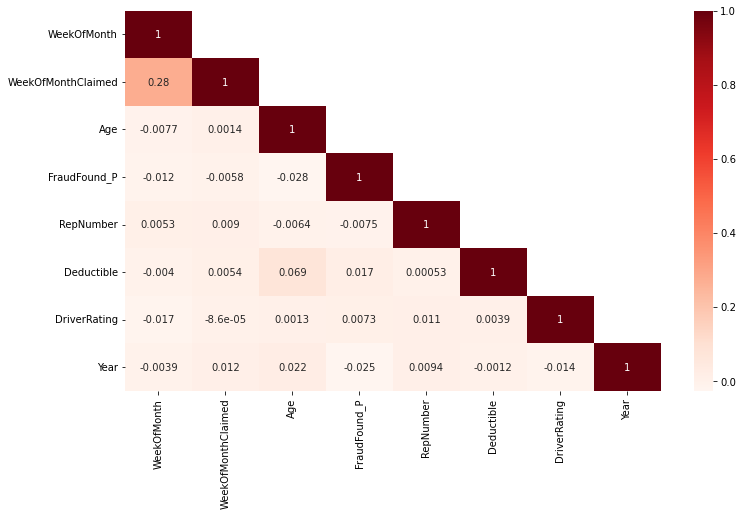

In [72]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [73]:
for labels, content in vic_temp.items():
    if pd.api.types.is_string_dtype(content):
        vic_temp[labels] = content.astype('category').cat.as_ordered()

In [74]:
vic_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15419 non-null  category
 1   WeekOfMonth           15419 non-null  int64   
 2   DayOfWeek             15419 non-null  category
 3   Make                  15419 non-null  category
 4   AccidentArea          15419 non-null  category
 5   DayOfWeekClaimed      15419 non-null  category
 6   MonthClaimed          15419 non-null  category
 7   WeekOfMonthClaimed    15419 non-null  int64   
 8   Sex                   15419 non-null  category
 9   MaritalStatus         15419 non-null  category
 10  Age                   15419 non-null  float64 
 11  Fault                 15419 non-null  category
 12  PolicyType            15419 non-null  category
 13  VehicleCategory       15419 non-null  category
 14  VehiclePrice          15419 non-null  category
 15  Fr

In [75]:
for labels, content in vic_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        vic_temp[labels] = pd.Categorical(content).codes

In [76]:
vic_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [77]:
vic_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,15419.0,5.532136,3.409703,0.0,3.0,6.0,8.0,11.0
WeekOfMonth,15419.0,2.788637,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,2.915883,2.055494,0.0,1.0,3.0,5.0,6.0
Make,15419.0,10.114858,5.282987,0.0,6.0,9.0,13.0,18.0
AccidentArea,15419.0,0.896426,0.304716,0.0,1.0,1.0,1.0,1.0
DayOfWeekClaimed,15419.0,3.203061,2.273766,0.0,1.0,4.0,5.0,6.0
MonthClaimed,15419.0,5.596148,3.410648,0.0,3.0,6.0,9.0,11.0
WeekOfMonthClaimed,15419.0,2.694079,1.259082,1.0,2.0,3.0,4.0,5.0
Sex,15419.0,0.843051,0.363765,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15419.0,1.303327,0.475113,0.0,1.0,1.0,2.0,3.0


In [78]:
corr_mat = vic_temp.corr()
corr_mat

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010625,-0.009549,0.000539,-0.000074,-0.025776,0.724419,0.042016,0.002916,-0.003956,...,-0.029181,0.010748,0.009986,-0.002107,0.015757,-0.010878,-0.007517,0.001341,0.028726,0.020484
WeekOfMonth,0.010625,1.000000,-0.011668,-0.001665,0.009002,0.015082,0.009982,0.275366,0.005332,0.019671,...,-0.014871,-0.002898,0.013020,0.013711,0.006472,-0.002867,0.008338,0.002511,-0.003949,-0.007818
DayOfWeek,-0.009549,-0.011668,1.000000,0.003321,0.006386,0.097647,-0.011997,-0.013954,-0.021214,-0.006547,...,0.004027,0.013165,-0.011908,0.000134,0.011516,-0.010873,-0.005148,0.001991,0.002549,0.014810
Make,0.000539,-0.001665,0.003321,1.000000,0.004127,-0.005187,0.010022,-0.007900,-0.026360,-0.010574,...,-0.052875,0.051961,-0.008083,-0.000490,-0.014913,-0.025168,-0.003390,-0.000226,0.010826,-0.019937
AccidentArea,-0.000074,0.009002,0.006386,0.004127,1.000000,-0.011394,-0.002618,0.006330,-0.033732,0.003321,...,-0.012278,0.007301,0.001722,-0.028385,-0.005214,0.005229,0.003755,-0.007856,0.002079,0.043560
DayOfWeekClaimed,-0.025776,0.015082,0.097647,-0.005187,-0.011394,1.000000,-0.015803,0.013635,-0.000203,-0.018055,...,-0.006408,0.008432,-0.018389,-0.001396,-0.015393,0.019484,0.011260,-0.010448,0.003512,-0.014472
MonthClaimed,0.724419,0.009982,-0.011997,0.010022,-0.002618,-0.015803,1.000000,0.032428,-0.002160,-0.007772,...,-0.021446,0.018572,0.013989,-0.008597,0.016148,0.001483,-0.013373,-0.001811,0.020948,0.028162
WeekOfMonthClaimed,0.042016,0.275366,-0.013954,-0.007900,0.006330,0.013635,0.032428,1.000000,0.003777,0.000411,...,0.004001,0.001091,0.023497,0.009363,-0.011326,-0.007022,-0.008322,0.008224,0.012082,0.013671
Sex,0.002916,0.005332,-0.021214,-0.026360,-0.033732,-0.000203,-0.002160,0.003777,1.000000,-0.114441,...,0.209081,0.065569,-0.007408,-0.005583,0.012685,0.001927,0.004429,0.000089,0.000444,-0.069729
MaritalStatus,-0.003956,0.019671,-0.006547,-0.010574,0.003321,-0.018055,-0.007772,0.000411,-0.114441,1.000000,...,-0.304444,-0.453924,0.011780,0.013870,0.007592,0.016658,-0.009557,-0.008284,-0.013893,0.048131


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_71011/1290100022.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

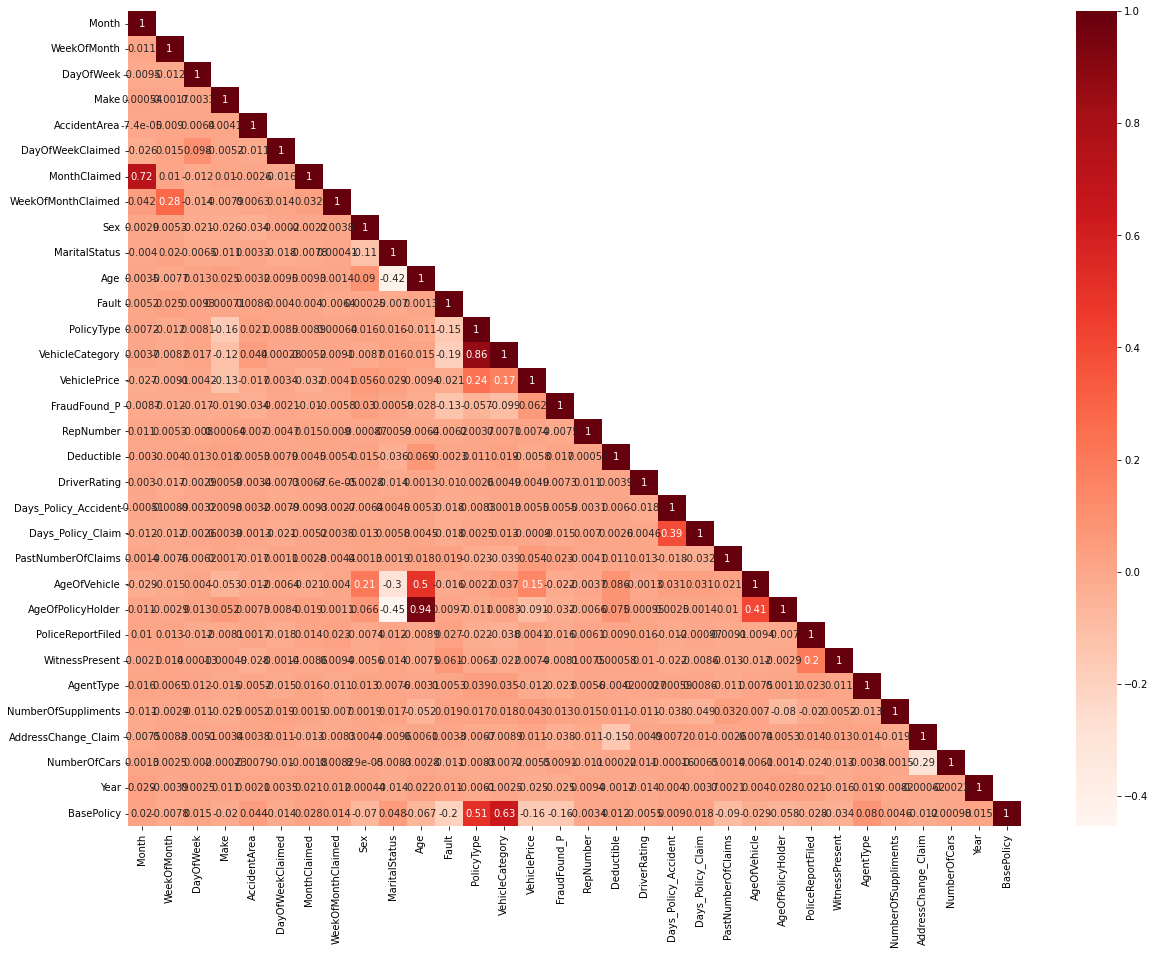

In [79]:
plt.figure(figsize=(20, 15))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')